In [1]:

%load_ext autoreload
%autoreload 2

import numpy as np
from misc import *
import matplotlib.pyplot as plt
from analyze import *

In [3]:
periods, ppp, itraj = 20, 1000, 0

In [20]:
histories={}
for k in range(1,9):
    #hist_A, hist_loss, hist_grads
    try:
        histories[k] = load_train_results(periods=30, ppp=ppp, train_id=k)
    except Exception:
        pass

In [21]:
histories.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])

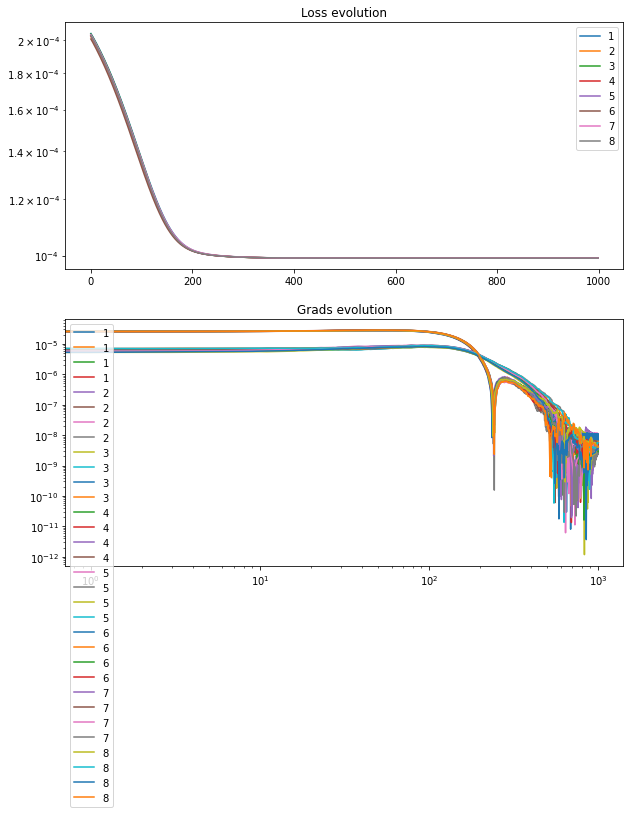

In [22]:
fig_size=(10,10)
fig = plt.figure(figsize=fig_size)

fig = display_histories(fig,histories)


In [23]:
for k in list(histories.keys()):
    print(histories[k][0][-1], "\n")

[[-1.6126     2.5142028]
 [-2.4434361 -1.6337636]] 

[[-1.6121178  2.5148933]
 [-2.4433131 -1.6339828]] 

[[-1.6119745  2.5149426]
 [-2.4433544 -1.6341138]] 

[[-1.6126844  2.5140808]
 [-2.443593  -1.6336647]] 

[[-1.6131973  2.512034 ]
 [-2.4448476 -1.6331922]] 

[[-1.6129787  2.5128446]
 [-2.444262  -1.6333812]] 

[[-1.612713   2.5137353]
 [-2.4437857 -1.6336424]] 

[[-1.6131806  2.5121567]
 [-2.4448137 -1.6331983]] 



In [7]:
for k in list(histories.keys()):
    print(histories[k][0][-1], "\n")

[[-1.4927692  2.4119766]
 [-2.4279695 -1.4907858]] 

[[-1.4923159  2.4147177]
 [-2.4257734 -1.4917911]] 

[[-1.4919192  2.415994 ]
 [-2.4243464 -1.4924618]] 

[[-1.4925883  2.413011 ]
 [-2.4270556 -1.4911354]] 

[[-1.4923364  2.4144492]
 [-2.4259753 -1.4916974]] 

[[-1.4927727  2.411886 ]
 [-2.428023  -1.490787 ]] 

[[-1.4919989  2.4157763]
 [-2.4248676 -1.4922694]] 



In [9]:
histories[k][0][-1]

array([[-1.4919989,  2.4157763],
       [-2.4248676, -1.4922694]], dtype=float32)

In [12]:
means, covs, signals, coeffs = load_data(get_def_path()+"20periods/1000ppp/")

In [13]:
A, dt, C, D = coeffs

In [16]:
D

array([[3.5, 0. ],
       [0. , 3.5]], dtype=float32)